<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import torch 

wine_path = 'winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)



In [2]:
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [3]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [4]:
#convert to Pytorch Tensor from NumPy
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [5]:
#data 
data = wineq[:,:-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [63]:
#target = wineq[:, -1].long()
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [7]:
#caluculate mean and variance of data
data_mean = torch.mean(data, dim = 0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [8]:
data_var = torch.var(data, dim = 0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [64]:
#normalized data
data_normalized = (data - data_mean)/torch.sqrt(data_var)
data_normalized

tensor([[ 1.7209e-01, -8.1764e-02,  2.1325e-01,  ..., -1.2468e+00,
         -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7991e-02,  ...,  7.3992e-01,
          1.3467e-03, -8.2418e-01],
        [ 1.4756e+00,  1.7448e-02,  5.4378e-01,  ...,  4.7502e-01,
         -4.3677e-01, -3.3662e-01],
        ...,
        [-4.2042e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3131e+00,
         -2.6152e-01, -9.0544e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0048e+00,
         -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7502e-01,
         -1.4882e+00,  1.0448e+00]])

In [10]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [11]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [16]:
data.shape, target.shape


(torch.Size([4898, 11]), torch.Size([4898]))

In [20]:
data[1,:]

tensor([6.3000e+00, 3.0000e-01, 3.4000e-01, 1.6000e+00, 4.9000e-02, 1.4000e+01,
        1.3200e+02, 9.9400e-01, 3.3000e+00, 4.9000e-01, 9.5000e+00])

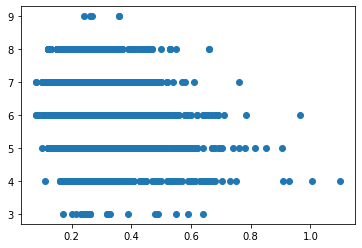

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data[:,1],target)

In [0]:
import torch.nn as nn
import torch.optim as optim



#seperate data for traning and validate set
n_samples = target.shape[0]
n_val = int(0.2*n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:n_val]
val_indices = shuffled_indices[-n_val:]

# data for training
train_data = data[train_indices]
train_data_n = data_normalized[train_indices]
train_target = target[train_indices]
# data for validation
val_data = data[val_indices]
val_data_n = data_normalized[val_indices]
val_target = target[val_indices]


In [0]:
num_features = 11
model = nn.Linear(num_features,1) #
#model(train_data).shape
#model.weight, model.bias
optimizer = optim.SGD(
    model.parameters(),
    lr=1e-2
)

In [58]:
model.parameters()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0835, -0.2269,  0.1669, -0.1559,  0.2006,  0.1495,  0.2227,  0.0961,
           0.1960,  0.2933, -0.0413]], requires_grad=True),
 Parameter containing:
 tensor([0.1286], requires_grad=True)]

In [0]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_data, train_target, val_data, val_target):
    for epoch in range(1, n_epochs+1): # one epoch: entire dataset is passed through NN once

        # Attatching model and loss function
        train_pred = model(train_data)  
        loss_train = loss_fn(train_pred, train_target)

        # To validate the model, we measure the testing error with testing data
        val_pred = model(val_data)
        loss_val = loss_fn(val_pred, val_target)

        # Attach optimizer to train the model
        optimizer.zero_grad() # should initialize gradient value at each iteration
        loss_train.backward() # gradinet is calculated
        optimizer.step() # parameter updates using gradient

        if epoch==1 or epoch % 1000 ==0:
          print('Epoch {}, Training loss {}, Validation loss {}'. format(
              epoch, float(loss_train), float(loss_val)
          ))

In [70]:
# Learning simple linear model
import torch.nn as nn
import torch.optim as optim

# Simple Linear Model
num_features = 11
model = nn.Linear(num_features,1) # Simple Linear Model without Activation Function
optimizer= optim.SGD(model.parameters(), lr=1e-1) # Stochastic Gradient Descent
loss_fn =nn.MSELoss() # Mean Squared Error

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=model,
    loss_fn= loss_fn,
    train_data = train_data_n,
    train_target = train_target,
    val_data = val_data_n,
    val_target = val_target
)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 35.17997741699219, Validation loss 35.079673767089844
Epoch 1000, Training loss 0.8065207600593567, Validation loss 0.7961960434913635
Epoch 2000, Training loss 0.8064256906509399, Validation loss 0.7961021661758423
Epoch 3000, Training loss 0.8064193725585938, Validation loss 0.7960962653160095
Epoch 4000, Training loss 0.8064193725585938, Validation loss 0.7960962653160095
Epoch 5000, Training loss 0.8064193725585938, Validation loss 0.7960962653160095


#Model Training with Neural Network

In [85]:
seq_model = nn.Sequential(
    nn.Linear(num_features, 32),
    nn.Tanh(),
    nn.Linear(32, 4),
    nn.ReLU(),
    nn.Linear(4,1)
)
seq_model

Sequential(
  (0): Linear(in_features=11, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [86]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=seq_model,
    loss_fn= loss_fn,
    train_data = train_data_n,
    train_target = train_target,
    val_data = val_data_n,
    val_target = val_target
)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 32.53366470336914, Validation loss 33.183937072753906
Epoch 1000, Training loss 0.8152031898498535, Validation loss 0.8075206875801086
Epoch 2000, Training loss 0.8103567361831665, Validation loss 0.8023004531860352
Epoch 3000, Training loss 0.8088628649711609, Validation loss 0.8002991080284119
Epoch 4000, Training loss 0.8081519603729248, Validation loss 0.7992321848869324
Epoch 5000, Training loss 0.8077348470687866, Validation loss 0.7985573410987854


#Alternate features for training

In [0]:
Selected_features = [0, 1, 6, 9]
# data for training
train_X = data[:,Selected_features]
train_X = train_X[train_indices]
train_Xn = data_normalized[:, Selected_features]
train_Xn = train_Xn[train_indices]
train_Y = target[train_indices]
# data for validation
val_X = data[:,Selected_features]
val_X = val_X[val_indices]
val_Xn = data_normalized[:, Selected_features]
val_Xn = val_Xn[val_indices]
val_Y = target[val_indices]

In [119]:
num_features = len(Selected_features)
seq_model = nn.Sequential(
    nn.Linear(num_features, 8),
    nn.Tanh(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4,1)
)
seq_model

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

#Training and Validation

In [121]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=seq_model,
    loss_fn= loss_fn,
    train_data = train_Xn,
    train_target = train_Y,
    val_data = val_Xn,
    val_target = val_Y
)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 0.8069146871566772, Validation loss 0.7967742681503296
Epoch 1000, Training loss 0.806910514831543, Validation loss 0.7967740297317505
Epoch 2000, Training loss 0.8069095611572266, Validation loss 0.7967537045478821
Epoch 3000, Training loss 0.80689537525177, Validation loss 0.7967445254325867
Epoch 4000, Training loss 0.8068940043449402, Validation loss 0.796735942363739
Epoch 5000, Training loss 0.8068898916244507, Validation loss 0.7967324256896973
